# Return Value Portrait Plot Demo

This notebook demostrates one way to make a portrait plot using the return value metrics from the PMP Extremes Driver. 

The portrait plot will show the bias in return values relative to observations for a single region.

Users have two options for running this notebook: they can either use randomly generated data or provide their own return value metrics files.

In [1]:
import json
import numpy as np

from pcmdi_metrics.graphics import portrait_plot

This function will be used to get the seasonal average bias across all realizations. To use a different statistics than 'bias_xy', make that change here:

In [2]:
# Average over realizations
def avg_all_real(metrics_dict,model,stat,region,season):
    vals = []
    for real in metrics_dict[model]:
        vals.append(metrics_dict[model][real][stat][region]["bias_xy"][season])
    avg = np.array(vals)
    avg = np.nanmean(vals)
    return avg
            

# Part 1: Process data

## Option 1: Create random data for demo only

If you do not have run results to plot but want to see how to generate a portrait plot, use this randomly generated array instead.

After running this cell, skip to the section **Part 2: Create Figure**.

In [3]:
data_all = np.random.rand(4,3,6)*3
model_list = ["Model1","Model2","Model3"]
region = "land"

## Option 2: Use Extremes Driver Output

If you do not have your own runs and would like to generate synthetic data, please use the **Option 1** instead.

This portrait plot will show the model bias relative to observations. This means that the results would come from a run of the Extremes Driver using the stationary return value option with observations included.

If multiple models and variables are being plotted, results will likely be needed from multiple different runs of the Extremes Driver. This notebook assumes that results for each variable (pr, tasmax, tasmin) are in separate runs, and therefore separate files. Different realizations for the same model should not be split across different runs.

Once each metrics file is loaded, results from multiple realizations are averaged by model. The results for each variable are then concatenated into a single array to make the portrait plot.

### Global settings

Provide the list of models (they will appear in this order in the figure). Also provide the region of the results.

In [ ]:
# Edit this cell
model_list = ["MRI-ESM2-0"]
region = "land"

### Precipitation

Provide the path to the JSON file containing precipitation (Rx1day and Rx5day) return value metrics in the first cell and run. Then run the following cell.

In [ ]:
# Edit this cell

# Your metrics JSON path goes here.
# This can be a single string or a list of strings for multiple files.
RxFile="demo2/return_value_metrics.json"

# Example of using a list of files, where each run has different models:
# RxFile = ["case1/return_value_metrics.json","case2/return_value_metrics.json"]

# If there is no precipitation data, set RxFile to empty:
# RxFile = ""

In [ ]:
# Do not edit this cell
if len(RxFile) > 0:
    # Load metrics
    if isinstance(RxFile,str):
        with open(RxFile,"r") as metrics_json:
            metrics=json.load(metrics_json)["RESULTS"]
    elif isinstance(RxFile,list):
        metrics = {}
        for fpath in RxFile:
            with open(fpath,"r") as metrics_json:
                metrics.update(json.load(metrics_json)["RESULTS"])

    # Get averages for multiple realizations
    statlist=["Rx1day","Rx5day"]
    nmodels=len(model_list)
    nstats = len(statlist)
    # Averages are stored in a season x models x indices sized array
    data_pr = np.ones((4,nmodels,nstats))*np.nan
    for s_ind,season in enumerate(["DJF","MAM","JJA","SON"]):
        for st_ind,stat in enumerate(statlist):
            for m_ind,model in enumerate(model_list):
                data_pr[s_ind,m_ind,st_ind] = avg_all_real(metrics,model,stat,region,season)
else:
    data_pr = None

### Max Temperature

Provide the path to the JSON file containing maximum temperature (TXx and TXn) return value metrics in the first cell and run. Then run the following cell.

In [ ]:
# Edit this cell

# Your metrics JSON path goes here.
# This can be a single string or a list of strings for multiple files.
TxFile="tasmax_json/return_value_metrics.json"

# If there is no temperature data, set TxFile to empty:
# TxFile = ""

In [ ]:
# Do not edit this cell
if len(TxFile) > 0:
    # Load metrics
    if isinstance(TxFile,str):
        with open(TxFile,"r") as metrics_json:
            metrics=json.load(metrics_json)["RESULTS"]
    elif isinstance(TxFile,list):
        metrics = {}
        for fpath in TxFile:
            with open(fpath,"r") as metrics_json:
                metrics.update(json.load(metrics_json)["RESULTS"])

    # Get averages for multiple realizations
    statlist=["TXx","TXn"]
    nmodels=len(model_list)
    nstats = len(statlist)
    # Averages are stored in a season x models x indices sized array
    data_tx = np.ones((4,nmodels,nstats))*np.nan
    for s_ind,season in enumerate(["DJF","MAM","JJA","SON"]):
        for st_ind,stat in enumerate(statlist):
            for m_ind,model in enumerate(model_list):
                data_tx[s_ind,m_ind,st_ind] = avg_all_real(metrics,model,stat,region,season)
else:
    data_tx = None

### Min Temperature

Provide the path to the JSON file containing minimum temperature (TNx and TNn) return value metrics in the first cell and run. Then run the following cell.

In [ ]:
# Edit this cell

# Your metrics JSON path goes here.
# This can be a single string or a list of strings for multiple files.
TnFile="tasmin_json/return_value_metrics.json"

# If there is no temperature data, set TnFile to empty:
# TnFile = ""

In [ ]:
# Do not edit this cell
if len(TnFile) > 0:
    # Load metrics
    if isinstance(TnFile,str):
        with open(TnFile,"r") as metrics_json:
            metrics=json.load(metrics_json)["RESULTS"]
    elif isinstance(TnFile,list):
        metrics = {}
        for fpath in TnFile:
            with open(fpath,"r") as metrics_json:
                metrics.update(json.load(metrics_json)["RESULTS"])

    # Get averages for multiple realizations
    statlist=["TNx","TNn"]
    nmodels=len(model_list)
    nstats = len(statlist)
    # Averages are stored in a season x models x indices sized array
    data_tn = np.ones((4,nmodels,nstats))*np.nan
    for s_ind,season in enumerate(["DJF","MAM","JJA","SON"]):
        for st_ind,stat in enumerate(statlist):
            for m_ind,model in enumerate(model_list):
                data_tn[s_ind,m_ind,st_ind] = avg_all_real(metrics,model,stat,region,season)
else:
    data_tn = None

Once all data files have been loaded and model averages have been created, concatenate the results into a single array.

In [ ]:
# Do not edit this cell
# Checking for what data exists
data_list = []
for item in [data_pr,data_tx,data_tn]:
    if item is not None:
        data_list.append(item)

# Concatenate existing data
data_tuple = tuple(data_list)
data_all = np.concatenate(data_tuple,axis=2)

You are now ready to continue to **Part 2: Create Figure**.

# Part 2: Create figure

This cell generates the portrait plot figure using the return value data previously gathered.

More options for the portrait_plot() function are documented in the [Mean Climate Portrait Plot Demo](https://github.com/PCMDI/pcmdi_metrics/blob/main/pcmdi_metrics/graphics/portrait_plot/portrait_plot_mean_clim.ipynb). The current settings are for a 3x6 portrait plot, but if you have a different number of models and indices you may need to change the settings to make an appealing figure.

First, provide the list of metrics and models for the figure. Take care that the labels match the order of the models and indices in the data_all array.

In [4]:
# Xaxis labels are the names of the block extremes
# This must follow the order that stats take in the data_all array
xaxis_labels = ['Rx1day', 'Rx5day', 'TXx', 'TXn', 'TNx', 'TNn']
# Yaxis labels are model names
yaxis_labels = model_list

This cell contains the portrait plot code along with some extra details like the plot title. Run this cell to see the portrait plot.

Text(1.25, 0.4, 'Data version\nversion')

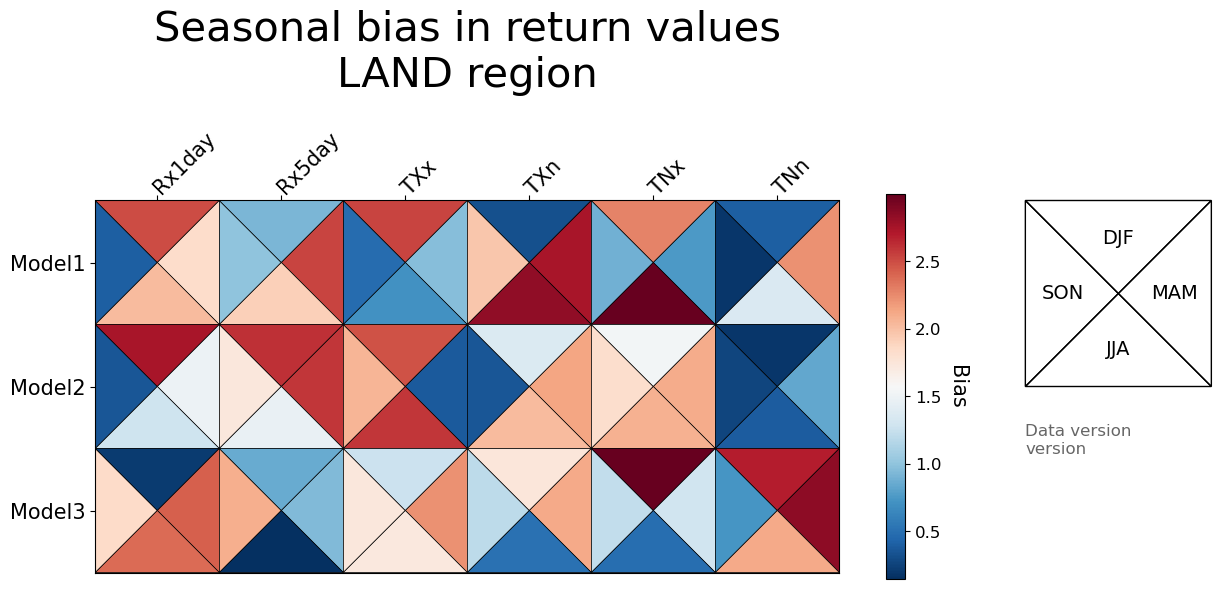

In [5]:
fig, ax, cbar = portrait_plot(data_all,  # or [data1, data2, data3, data4] (top, right, bottom, left: clockwise from top)
                              xaxis_labels=xaxis_labels, 
                              yaxis_labels=yaxis_labels, 
                              cbar_label='Bias',
                              cbar_kw = {"shrink":0.5},
                              legend_on=True,
                              legend_labels=['DJF','MAM','JJA','SON'],
                              box_as_square=True,
                              logo_off=True
                             )

# Add title
ax.set_title("Seasonal bias in return values\n{0} region".format(region.upper()), fontsize=30, pad=30)

# Add data info
data_version="version"
fig.text(1.25, 0.4, 'Data version\n'+data_version, transform=ax.transAxes,
         fontsize=12, color='black', alpha=0.6, ha='left', va='top',)